<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/renewable_energy/blob/main/time_series_prediction_of_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd

**Based of the information gathered from other notebooks, I would like to try instead to build a machine learning model to predict the time series data**

# 1. Loading and briefly looking at the data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/재생에너지/solar_weather.csv')
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [6]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


# 2. Change dataframe index to datetime and converting time data to time signal

In [7]:
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483229e+09
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483230e+09
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483231e+09
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483232e+09
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,1.483232e+09


In [8]:
day = 60 * 60 * 24
year = 365.2425 * day

In [9]:
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [10]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


# 3. Preparing data for machine learning

**My plan is to split 80% data for training, 10% for validation, and 10% for testing**

In [11]:
train_count = round(0.8 * len(df))
val_count = round(0.9 * len(df))

In [12]:
df_train = df[:train_count]
df_val = df[train_count:val_count]
df_test = df[val_count:]

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

**My plan is to predict the data based from the previous 20 data points using LSTM**

In [15]:
WINDOW_SIZE = 20

In [16]:
def df_to_data1(df, window_size=5):
    data = scaler.fit_transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()

    X = []
    y = []

    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])

    return np.array(X), np.array(y)

In [17]:
def df_to_data2(df, window_size=5):
    data = scaler.transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()

    X = []
    y = []

    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])

    return np.array(X), np.array(y)

In [18]:
X_train, y_train = df_to_data1(df_train, window_size=WINDOW_SIZE)
X_val, y_val = df_to_data2(df_val, window_size=WINDOW_SIZE)
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

# 4. Generating and fitting model

In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [20]:
model = models.Sequential([
    layers.LSTM(64, input_shape=(WINDOW_SIZE, X_train.shape[2])),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          20,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 194,433 (759.50 KB)

 Trainable params: 194,433 (759.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [22]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 117s 23ms/step - loss: 266262.5000 - mae: 234.6069 - mse: 266262.5000 - val_loss: 88261.5391 - val_mae: 123.7853 - val_mse: 88261.5391
Epoch 2/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 137s 22ms/step - loss: 99884.0156 - mae: 136.7048 - mse: 99884.0156 - val_loss: 79040.9766 - val_mae: 116.7619 - val_mse: 79040.9766
Epoch 3/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 134s 21ms/step - loss: 97707.5859 - mae: 133.4500 - mse: 97707.5859 - val_loss: 88752.1406 - val_mae: 122.2155 - val_mse: 88752.1406
Epoch 4/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 140s 20ms/step - loss: 96185.3984 - mae: 131.0825 - mse: 96185.3984 - val_loss: 81150.4922 - val_mae: 115.8372 - val_mse: 81150.4922
Epoch 5/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 144s 21ms/step - loss: 94597.3359 - mae: 130.0009 - mse: 94597.3359 - val_loss: 78862.5703 - val_mae: 114.2251 - val_mse: 78862.5703
Epoch 6/10
4919/4919 ━━━━━━━━━━━━━━━━━━━━ 142s 21ms/step - loss: 93809.3984 - mae: 129.0937 - mse: 93809.3984 - val_loss: 8

# 5. Analyzing model performance using test data

In [23]:
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions = np.hstack(predictions)
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)

615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
MSE 143972.54
MAE 161.16
SignificanceResult(statistic=0.9353391888465146, pvalue=0.0)


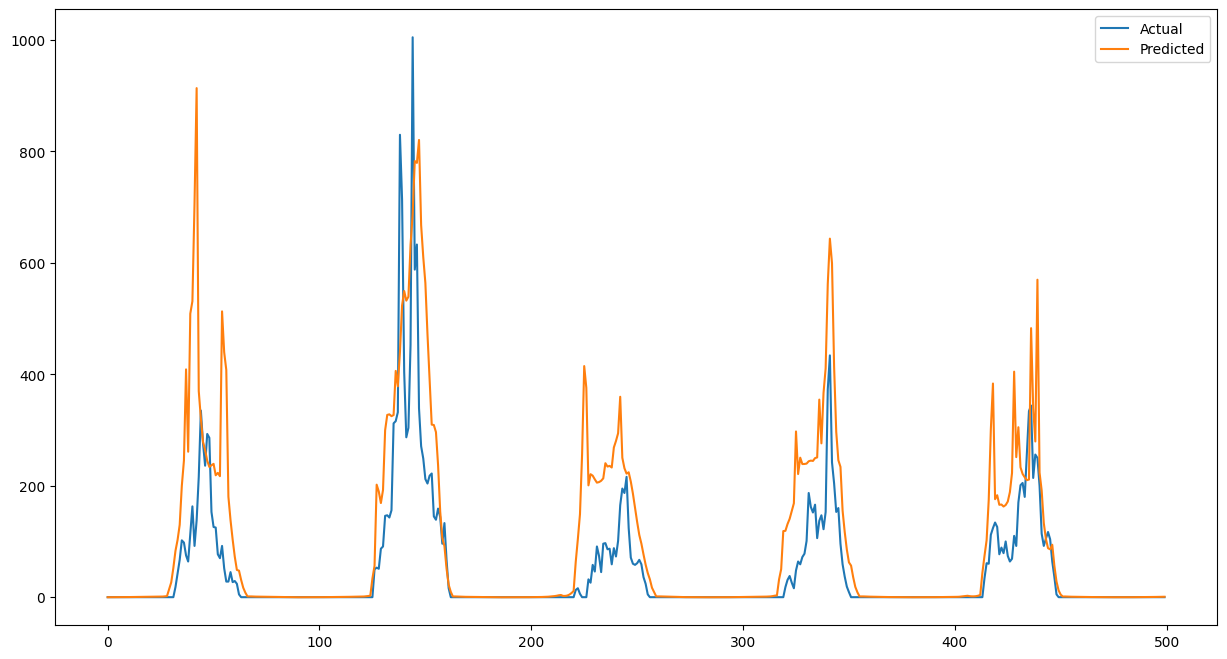

In [26]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)